# Lab02_108032053

## 1. Load dataset

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd

import os
if not os.path.exists("output/"):
  os.mkdir("output/")

import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')

X = df.drop(labels='Class label', axis=1)
y = df['Class label']

df.head()

,Class label,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
0,2.0,-0.016488,-1.310538,-1.552489,-0.785475,1.548429,0.476687,1.090010,-0.351870,-0.000855,-1.932941,0.499177,0.149137,-0.640413,-0.782951,-0.903561
1,0.0,-0.844201,-1.235142,-0.624408,1.502470,-0.079536,1.482053,1.178544,-1.150090,-1.040124,-1.041435,0.281037,-0.283710,-1.176802,0.718408,-0.392095
2,0.0,-0.181053,0.039422,-0.307827,0.162256,-1.283705,0.541288,0.019113,-0.470718,-1.045754,0.983150,-0.121205,-0.189225,-0.539178,0.825261,0.612889
3,2.0,-0.423555,-1.598754,1.597206,-0.239330,1.443564,2.657538,1.824393,-1.809287,1.058634,-4.058539,0.255908,-0.952422,-0.315551,1.854246,-2.369018
4,2.0,-0.499408,-0.814229,-0.178777,-1.757823,0.678134,3.552825,1.483069,-2.341943,2.155062,-4.380612,-0.239352,-1.730919,0.586125,3.902178,-2.891653


## 2. PCA

In [34]:
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df.shape[0]

# Calculate the eigen values, eigen vectors
eigen_vals, eigen_vecs = np.linalg.eigh(R)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

# Form the projection matrix
W_2D = np.hstack(tuple(e_vec[:, np.newaxis] for e_val, e_vec in eigen_pairs[:2]))
W_3D = np.hstack(tuple(e_vec[:, np.newaxis] for e_val, e_vec in eigen_pairs[:3]))


## 3. Visualization

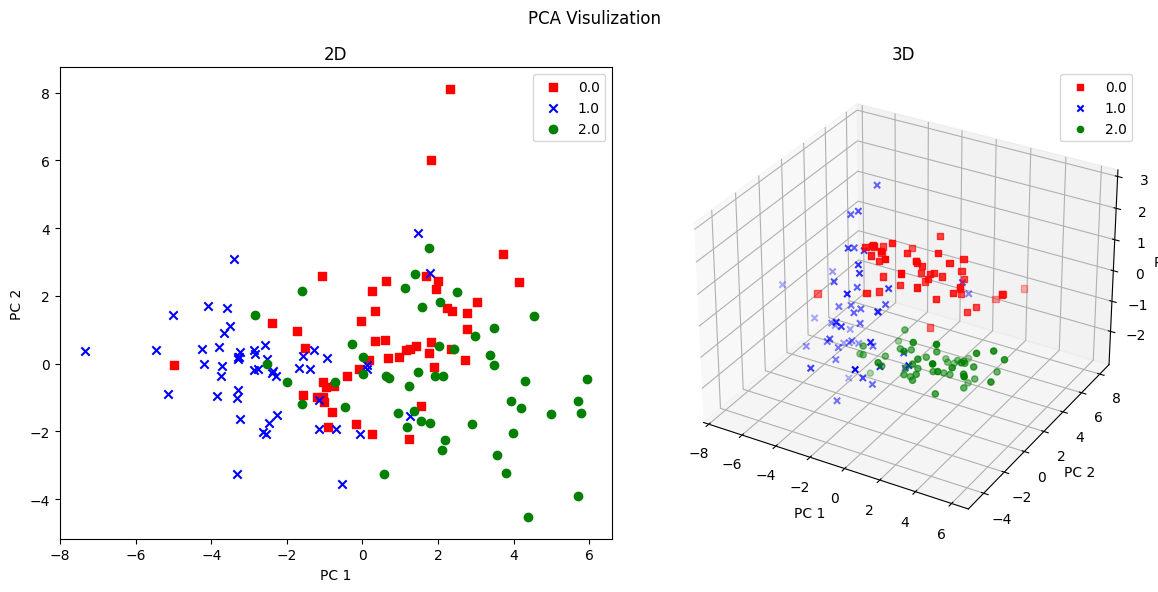

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Z_pca_2D = Z.dot(W_2D)
Z_pca_3D = Z.dot(W_3D)

# Plot settings
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(12, 6))
fig.suptitle('PCA Visulization')

# Plot 2D
ax_2d = fig.add_subplot(1, 2, 1)
for l, c, m in zip(np.unique(y), colors, markers):
  ax_2d.scatter(*tuple(Z_pca_2D[y == l, i] for i in range(2)), c=c, label=l, marker=m)
ax_2d.set_title('2D')
ax_2d.set_xlabel('PC 1')
ax_2d.set_ylabel('PC 2')
ax_2d.legend(loc='best')

# Plot 3D
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')
for l, c, m in zip(np.unique(y), colors, markers):
  ax_3d.scatter(*tuple(Z_pca_3D[y == l, i] for i in range(3)), c=c, label=l, marker=m)
ax_3d.set_title('3D')
ax_3d.set_xlabel('PC 1')
ax_3d.set_ylabel('PC 2')
ax_3d.set_zlabel('PC 3')
ax_3d.legend(loc='best')

plt.tight_layout()
plt.savefig('./output/pca_2D_3D.png', dpi=300)
plt.show()